In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings # ignore any warning
warnings.filterwarnings("ignore")

In [2]:
# to read csv file
urchin = pd.read_excel("sea_urchin.xlsx")

In [3]:
# first 5 rows of dataset
urchin.head()

,site,ID,pH,pCO2water_SST_wet,temp,eggs_d,number,sperm,eggs,fert_eggs_norm,...,omega_aragonite_co2,csc_flag_seacarb,co2_seacarb,fCO2water_SST_wet_seacarb,pCO2water_SST_wet_seacarb,hco3_seacarb,co3_seacarb,dic_seacarb,omega_aragonite_seacarb,omega_cal_seacarb
0,Fogarty_Creek,1,8.03,387.0,14.4,0.082995,1,4100.00,228.0,145.0,...,2.295,8,14.89,386.46,387.87,1880.25,148.22,2043.36,2.29,3.57
1,Fogarty_Creek,1,8.03,387.0,14.4,0.082995,2,410.00,248.0,207.0,...,2.295,8,14.89,386.46,387.87,1880.25,148.22,2043.36,2.29,3.57
2,Fogarty_Creek,1,8.03,387.0,14.4,0.082995,3,41.00,210.0,201.0,...,2.295,8,14.89,386.46,387.87,1880.25,148.22,2043.36,2.29,3.57
3,Fogarty_Creek,1,8.03,387.0,14.4,0.082995,4,4.10,232.0,107.0,...,2.295,8,14.89,386.46,387.87,1880.25,148.22,2043.36,2.29,3.57
4,Fogarty_Creek,1,8.03,387.0,14.4,0.082995,5,0.41,218.0,12.0,...,2.295,8,14.89,386.46,387.87,1880.25,148.22,2043.36,2.29,3.57


In [4]:
# to check the null value in dataset
urchin.isnull().sum()/len(urchin)*100

site                         0.000000
ID                           0.000000
pH                           0.000000
pCO2water_SST_wet            0.000000
temp                         0.000000
eggs_d                       0.000000
number                       0.000000
sperm                        0.000000
eggs                         0.122549
fert_eggs_norm               0.122549
unfert_eggs                  0.122549
fert_eggs_abnorm             0.122549
abn_eggs                     0.122549
salinity                     0.000000
total_alkanility             0.000000
diss_inorg_carbon            0.000000
pH_spectrophotometric        0.000000
pCO2water_SST_wet_co2        0.000000
omega_cal _co2               0.000000
omega_aragonite_co2          0.000000
csc_flag_seacarb             0.000000
co2_seacarb                  0.000000
fCO2water_SST_wet_seacarb    0.000000
pCO2water_SST_wet_seacarb    0.000000
hco3_seacarb                 0.000000
co3_seacarb                  0.000000
dic_seacarb 

#### We found .12% missing values in four columns

In [5]:
#to assign average value of eggs produced to the missing value block based on pH dependence.
eggs_avg = urchin.pivot_table(values = 'eggs', index = 'pH')
eggs_avg.head()


,eggs
pH,
7.61,216.647727
7.75,213.772059
7.87,207.593750
8.03,214.457565


In [6]:
# function to assign average value to missing value block
def impute_eggs(cols):
    Eggs = cols[0]
    ph = cols[1]
    
    if pd.isnull(Eggs):
        return eggs_avg['eggs'][eggs_avg.index == ph]
    
    else:
        return Eggs

In [7]:
print('Original #missing: %d'%sum(urchin['eggs'].isnull())) # initial number of null blocks
urchin['eggs'] = urchin[['eggs', 'pH']].apply(impute_eggs, axis = 1).astype(float)
print('Final #missing: %d'%sum(urchin['eggs'].isnull())) # null blocks after applying impute_eggs function

# At 369 row we can see that eggs value is missing(can be seen in csv file)

Original #missing: 1
Final #missing: 0


In [8]:
#similarly for  other four parametres but this time they are dependent of sperm concentration (here number 
# how many times dilution of sperm occurs?) eg, for number = 1, i.e. only 1 time dilution of sperm occurs, by 
# one time we mean that by 10 litre

fert_eggs_norm_avg = urchin.pivot_table(values = 'fert_eggs_norm', index = 'number')
fert_eggs_norm_avg.head()

,fert_eggs_norm
number,
1,157.245098
2,177.970588
3,201.176471
4,147.558824
5,34.019608


In [9]:
# function to assign average value to missing value block
def impute_fen(cols):
    Fert_eggs_norm = cols[0]
    Number = cols[1]
    
    if pd.isnull(Fert_eggs_norm):
        return fert_eggs_norm_avg['fert_eggs_norm'][fert_eggs_norm_avg.index == Number]
    
    else:
        return Fert_eggs_norm

In [10]:
print('Original #missing: %d'%sum(urchin['fert_eggs_norm'].isnull()))
urchin['fert_eggs_norm'] = urchin[['fert_eggs_norm', 'number']].apply(impute_fen, axis = 1).astype(float)
print('Final #missing: %d'%sum(urchin['fert_eggs_norm'].isnull()))

Original #missing: 1
Final #missing: 0


In [11]:
# unfert_eggs
unfert_eggs_avg = urchin.pivot_table(values = 'unfert_eggs', index = 'number')

def impute_ufe(cols):
    Unfert_eggs = cols[0]
    Number = cols[1]
    
    if pd.isnull(Unfert_eggs):
        return unfert_eggs_avg['unfert_eggs'][unfert_eggs_avg.index == Number]
    
    else:
        return Unfert_eggs
    
print('Original #missing: %d'%sum(urchin['unfert_eggs'].isnull()))
urchin['unfert_eggs'] = urchin[['unfert_eggs', 'number']].apply(impute_ufe, axis = 1).astype(float)
print('Final #missing: %d'%sum(urchin['unfert_eggs'].isnull()))

Original #missing: 1
Final #missing: 0


In [12]:
# unfert_eggs
fert_eggs_abnorm_avg = urchin.pivot_table(values = 'fert_eggs_abnorm', index = 'number')

def impute_fea(cols):
    Fert_eggs_abnorm = cols[0]
    Number = cols[1]
    
    if pd.isnull(Fert_eggs_abnorm):
        return fert_eggs_abnorm_avg['fert_eggs_abnorm'][fert_eggs_abnorm_avg.index == Number]
    
    else:
        return Fert_eggs_abnorm
    
print('Original #missing: %d'%sum(urchin['fert_eggs_abnorm'].isnull()))
urchin['fert_eggs_abnorm'] = urchin[['fert_eggs_abnorm', 'number']].apply(impute_fea, axis = 1).astype(float)
print('Final #missing: %d'%sum(urchin['fert_eggs_abnorm'].isnull()))

Original #missing: 1
Final #missing: 0


In [13]:
# Abnormal_eggs
abn_eggs_avg = urchin.pivot_table(values = 'abn_eggs', index = 'number')

def impute_ae(cols):
    Abn_eggs = cols[0]
    Number = cols[1]
    
    if pd.isnull(Abn_eggs):
        return abn_eggs_avg['abn_eggs'][abn_eggs_avg.index == Number]
    
    else:
        return Abn_eggs
    
print('Original #missing: %d'%sum(urchin['abn_eggs'].isnull()))
urchin['abn_eggs'] = urchin[['abn_eggs', 'number']].apply(impute_ae, axis = 1).astype(float)
print('Final #missing: %d'%sum(urchin['abn_eggs'].isnull()))

Original #missing: 1
Final #missing: 0


In [14]:
# instead of above methods, I can also assign just average columns to these Null values 
# urchin['fert_eggs_norm'].fillna(urchin['fert_eggs_norm'].median(), inplace=True)
# urchin['fert_eggs_norm'].fillna(urchin['fert_eggs_norm'].mode()[0], inplace=True)

In [15]:
urchin.isnull().sum()/len(urchin)*100
# Now we can see that no missing value remain in our dataset

site                         0.0
ID                           0.0
pH                           0.0
pCO2water_SST_wet            0.0
temp                         0.0
eggs_d                       0.0
number                       0.0
sperm                        0.0
eggs                         0.0
fert_eggs_norm               0.0
unfert_eggs                  0.0
fert_eggs_abnorm             0.0
abn_eggs                     0.0
salinity                     0.0
total_alkanility             0.0
diss_inorg_carbon            0.0
pH_spectrophotometric        0.0
pCO2water_SST_wet_co2        0.0
omega_cal _co2               0.0
omega_aragonite_co2          0.0
csc_flag_seacarb             0.0
co2_seacarb                  0.0
fCO2water_SST_wet_seacarb    0.0
pCO2water_SST_wet_seacarb    0.0
hco3_seacarb                 0.0
co3_seacarb                  0.0
dic_seacarb                  0.0
omega_aragonite_seacarb      0.0
omega_cal_seacarb            0.0
dtype: float64

## Variance

Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

In [16]:
urchin.var()

ID                           1.105940e+01
pH                           2.611859e-02
pCO2water_SST_wet            9.131146e+04
temp                         1.737240e-01
eggs_d                       3.677485e-06
number                       5.256442e+00
sperm                        5.246531e+06
eggs                         6.331485e+02
fert_eggs_norm               7.747579e+03
unfert_eggs                  9.122313e+03
fert_eggs_abnorm             1.606623e+01
abn_eggs                     7.434973e+02
salinity                     1.014700e-02
total_alkanility             8.310975e+01
diss_inorg_carbon            3.949483e+03
pH_spectrophotometric        1.019088e-01
pCO2water_SST_wet_co2        9.130800e+04
omega_cal _co2               6.485182e-01
omega_aragonite_co2          2.652172e-01
csc_flag_seacarb             0.000000e+00
co2_seacarb                  1.345522e+02
fCO2water_SST_wet_seacarb    9.101373e+04
pCO2water_SST_wet_seacarb    9.168002e+04
hco3_seacarb                 7.116

The variance of eggs diameter and salinity and temperature in very low, we can drop the column, while other low variance columns are putting small impact on pH and small impact in pH matters alot in our model.


In [17]:
urchin = urchin.drop(columns=['eggs_d', 'salinity', 'temp', 'csc_flag_seacarb', 'ID'])
# Dropping the low variance columns

In [18]:
urchin.columns

Index(['site', 'pH', 'pCO2water_SST_wet', 'number', 'sperm', 'eggs',
       'fert_eggs_norm', 'unfert_eggs', 'fert_eggs_abnorm', 'abn_eggs',
       'total_alkanility', 'diss_inorg_carbon', 'pH_spectrophotometric',
       'pCO2water_SST_wet_co2', 'omega_cal _co2', 'omega_aragonite_co2',
       'co2_seacarb', 'fCO2water_SST_wet_seacarb', 'pCO2water_SST_wet_seacarb',
       'hco3_seacarb', 'co3_seacarb', 'dic_seacarb', 'omega_aragonite_seacarb',
       'omega_cal_seacarb'],
      dtype='object')

In [19]:
urchin.corr()
# correlation 

,pH,pCO2water_SST_wet,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,total_alkanility,...,omega_cal _co2,omega_aragonite_co2,co2_seacarb,fCO2water_SST_wet_seacarb,pCO2water_SST_wet_seacarb,hco3_seacarb,co3_seacarb,dic_seacarb,omega_aragonite_seacarb,omega_cal_seacarb
pH,1.000000,-9.763003e-01,0.000000e+00,-0.043562,-0.029420,-0.020285,0.001275,0.010401,0.031536,-0.246275,...,0.976051,9.760732e-01,-9.749798e-01,-9.763934e-01,-9.763925e-01,-9.780865e-01,9.758254e-01,-0.978809,9.760878e-01,9.759983e-01
pCO2water_SST_wet,-0.976300,1.000000e+00,-5.637701e-18,0.037679,0.037229,0.021218,0.000153,-0.022934,-0.030590,0.286845,...,-0.959838,-9.599062e-01,9.994667e-01,9.999979e-01,9.999978e-01,9.667663e-01,-9.596110e-01,0.976699,-9.593621e-01,-9.597864e-01
number,0.000000,-5.637701e-18,1.000000e+00,-0.574193,-0.166512,-0.833820,0.899893,-0.595490,-0.527587,0.000000,...,0.000000,1.845975e-18,-2.130858e-18,-1.613404e-18,4.018827e-18,7.212219e-19,-4.578458e-19,0.000000,2.316179e-18,3.554500e-18
sperm,-0.043562,3.767924e-02,-5.741928e-01,1.000000,-0.030080,0.304958,-0.443815,0.316212,0.496165,0.047398,...,-0.032984,-3.298996e-02,3.697021e-02,3.765618e-02,3.765519e-02,3.738795e-02,-3.298471e-02,0.039647,-3.307633e-02,-3.293008e-02
eggs,-0.029420,3.722880e-02,-1.665115e-01,-0.030080,1.000000,0.314042,-0.028113,0.033574,0.002586,0.192276,...,-0.015966,-1.607159e-02,3.856033e-02,3.726309e-02,3.726489e-02,3.634570e-02,-1.570200e-02,0.047691,-1.598151e-02,-1.614885e-02
fert_eggs_norm,-0.020285,2.121793e-02,-8.338205e-01,0.304958,0.314042,1.000000,-0.916968,0.543761,0.194386,0.049350,...,-0.016081,-1.605291e-02,2.068847e-02,2.118307e-02,2.118242e-02,2.113977e-02,-1.605872e-02,0.023748,-1.582642e-02,-1.597307e-02
unfert_eggs,0.001275,1.528798e-04,8.998931e-01,-0.443815,-0.028113,-0.916968,1.000000,-0.625628,-0.477321,-0.003586,...,0.000963,9.939914e-04,-2.480868e-04,1.618329e-04,1.611167e-04,-1.322562e-03,9.544997e-04,-0.001318,8.866938e-04,8.773849e-04
fert_eggs_abnorm,0.010401,-2.293362e-02,-5.954897e-01,0.316212,0.033574,0.543761,-0.625628,1.000000,0.320515,-0.204900,...,0.008695,8.975395e-03,-2.596781e-02,-2.296523e-02,-2.297066e-02,-3.073049e-02,8.513024e-03,-0.041618,8.380379e-03,8.940032e-03
abn_eggs,0.031536,-3.059000e-02,-5.275870e-01,0.496165,0.002586,0.194386,-0.477321,0.320515,1.000000,0.060775,...,0.031752,3.141254e-02,-2.581083e-02,-3.047270e-02,-3.046563e-02,-2.479496e-02,3.197656e-02,-0.021181,3.122309e-02,3.149862e-02
total_alkanility,-0.246275,2.868445e-01,0.000000e+00,0.047398,0.192276,0.049350,-0.003586,-0.204900,0.060775,1.000000,...,-0.178775,-1.797625e-01,2.968013e-01,2.866849e-01,2.866993e-01,2.823971e-01,-1.774322e-01,0.340677,-1.780545e-01,-1.790396e-01


In [20]:
urchin['pH_spectrophotometric'][0] # manually find lutlier value in the dataset, i.e having a close look at data

0.0

In [21]:
urchin.loc[0, 'pH_spectrophotometric'] = 8.054  # Assigning correct value to outlier (can be seen in csv file)

In [22]:
urchin['pH_spectrophotometric'][0]

8.054

Since the value of last 15 columns is consistent, therefore we converted these columns into 2 columns with the help of PCA reduction.

In [23]:
urchin.columns

Index(['site', 'pH', 'pCO2water_SST_wet', 'number', 'sperm', 'eggs',
       'fert_eggs_norm', 'unfert_eggs', 'fert_eggs_abnorm', 'abn_eggs',
       'total_alkanility', 'diss_inorg_carbon', 'pH_spectrophotometric',
       'pCO2water_SST_wet_co2', 'omega_cal _co2', 'omega_aragonite_co2',
       'co2_seacarb', 'fCO2water_SST_wet_seacarb', 'pCO2water_SST_wet_seacarb',
       'hco3_seacarb', 'co3_seacarb', 'dic_seacarb', 'omega_aragonite_seacarb',
       'omega_cal_seacarb'],
      dtype='object')

Below, we select 14 columns which are showing some sort of correlation between each other and then we split it into two sub columns related to pH and pressure.   

In [24]:
pH_related = ['diss_inorg_carbon', 'co2_seacarb', 'hco3_seacarb','dic_seacarb', 'fCO2water_SST_wet_seacarb', 'pCO2water_SST_wet_co2','pCO2water_SST_wet_seacarb']
            # Column which are related with pH is merged into one column
    
pressure_related = [ 'pH_spectrophotometric', 'omega_cal _co2', 'omega_aragonite_co2', 'co3_seacarb', 'omega_aragonite_seacarb','omega_cal_seacarb', 'total_alkanility' ]
            # Column which are related with pressure is merged into single column


In [25]:
pH_x = urchin.loc[:, pH_related].values
pressure_x = urchin.loc[:, pressure_related].values
# assigning 2-D numpy arrays to the respective variables 

In [26]:
print(pH_x.shape)
print(pressure_x.shape)
# shape of the numpy 2-D array

(816, 7)
(816, 7)


In [27]:
print(type(pH_x))
print(type(pressure_x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
pd.DataFrame(data = pH_x, columns = pH_related).head() # pH related column dataframe

,diss_inorg_carbon,co2_seacarb,hco3_seacarb,dic_seacarb,fCO2water_SST_wet_seacarb,pCO2water_SST_wet_co2,pCO2water_SST_wet_seacarb
0,2042.648,14.89,1880.25,2043.36,386.46,386.968,387.87
1,2042.648,14.89,1880.25,2043.36,386.46,386.968,387.87
2,2042.648,14.89,1880.25,2043.36,386.46,386.968,387.87
3,2042.648,14.89,1880.25,2043.36,386.46,386.968,387.87
4,2042.648,14.89,1880.25,2043.36,386.46,386.968,387.87


In [29]:
pd.DataFrame(data = pressure_x, columns = pressure_related).head() # pressure related column dataframe

,pH_spectrophotometric,omega_cal _co2,omega_aragonite_co2,co3_seacarb,omega_aragonite_seacarb,omega_cal_seacarb,total_alkanility
0,8.054,3.59,2.295,148.22,2.29,3.57,2247.303
1,8.054,3.59,2.295,148.22,2.29,3.57,2247.303
2,8.054,3.59,2.295,148.22,2.29,3.57,2247.303
3,8.054,3.59,2.295,148.22,2.29,3.57,2247.303
4,8.054,3.59,2.295,148.22,2.29,3.57,2247.303


## PCA Projection to 2D

In [30]:
pca = PCA(n_components=1) # Convert n column dataframe into 1-D with the help of PCA technique  

In [31]:
principalComponent_pH = pca.fit_transform(pH_x) # pricipal component pH related
print(pca.explained_variance_ratio_, "variance ratio related with pH")

principalComponent_pressure = pca.fit_transform(pressure_x) # principal component pressure related
print(pca.explained_variance_ratio_, "variance ration related with pressure")

[0.99727416] variance ratio related with pH
[0.93245483] variance ration related with pressure


In [32]:
principalDf_pH = pd.DataFrame(data = principalComponent_pH, columns = ['Principal Component pH_related'])
principalDf_pressure = pd.DataFrame(data = principalComponent_pressure, columns = ['Principal Component pressure_related'])


In [33]:
principalDf_pH.head() # 5 upper rows of pH related dataframe

,Principal Component pH_related
0,-656.176953
1,-656.176953
2,-656.176953
3,-656.176953
4,-656.176953


In [34]:
principalDf_pressure.head() # 5 upper rows of pressure related dataframe

,Principal Component pressure_related
0,48.555263
1,48.555263
2,48.555263
3,48.555263
4,48.555263


In [35]:
finalDf = pd.concat([principalDf_pH, principalDf_pressure], axis = 1) # To concat these two pricipal component dataframe

In [36]:
finalDf.head()

,Principal Component pH_related,Principal Component pressure_related
0,-656.176953,48.555263
1,-656.176953,48.555263
2,-656.176953,48.555263
3,-656.176953,48.555263
4,-656.176953,48.555263


In [37]:
# Now we have to drop the columns which have been used to built the principal component

urchin.columns

Index(['site', 'pH', 'pCO2water_SST_wet', 'number', 'sperm', 'eggs',
       'fert_eggs_norm', 'unfert_eggs', 'fert_eggs_abnorm', 'abn_eggs',
       'total_alkanility', 'diss_inorg_carbon', 'pH_spectrophotometric',
       'pCO2water_SST_wet_co2', 'omega_cal _co2', 'omega_aragonite_co2',
       'co2_seacarb', 'fCO2water_SST_wet_seacarb', 'pCO2water_SST_wet_seacarb',
       'hco3_seacarb', 'co3_seacarb', 'dic_seacarb', 'omega_aragonite_seacarb',
       'omega_cal_seacarb'],
      dtype='object')

In [38]:
urchin = urchin.drop(['pCO2water_SST_wet', 'total_alkanility', 'diss_inorg_carbon', 'pH_spectrophotometric', 
                      'pCO2water_SST_wet_co2', 'omega_cal _co2', 'omega_aragonite_co2', 'co2_seacarb',
                      'fCO2water_SST_wet_seacarb', 'pCO2water_SST_wet_seacarb', 'hco3_seacarb', 'co3_seacarb',
                      'dic_seacarb', 'omega_aragonite_seacarb', 'omega_cal_seacarb'], axis = 1)
# Dropping those columns which are used in calculating principal components from the dataframe

In [39]:
urchin.shape # Current shape

(816, 9)

In [40]:
urchin.head()

,site,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs
0,Fogarty_Creek,8.03,1,4100.00,228.0,145.0,0.0,8.0,75.0
1,Fogarty_Creek,8.03,2,410.00,248.0,207.0,0.0,9.0,32.0
2,Fogarty_Creek,8.03,3,41.00,210.0,201.0,1.0,2.0,6.0
3,Fogarty_Creek,8.03,4,4.10,232.0,107.0,123.0,2.0,0.0
4,Fogarty_Creek,8.03,5,0.41,218.0,12.0,206.0,0.0,0.0


In [41]:
# To add principal component dataframe and our main dataframe
urchin = pd.concat([urchin, finalDf], axis = 1)

In [42]:
# To calculate final shape
urchin.shape

(816, 11)

In [43]:
urchin.columns

Index(['site', 'pH', 'number', 'sperm', 'eggs', 'fert_eggs_norm',
       'unfert_eggs', 'fert_eggs_abnorm', 'abn_eggs',
       'Principal Component pH_related',
       'Principal Component pressure_related'],
      dtype='object')

In [44]:
urchin.head()

,site,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH_related,Principal Component pressure_related
0,Fogarty_Creek,8.03,1,4100.00,228.0,145.0,0.0,8.0,75.0,-656.176953,48.555263
1,Fogarty_Creek,8.03,2,410.00,248.0,207.0,0.0,9.0,32.0,-656.176953,48.555263
2,Fogarty_Creek,8.03,3,41.00,210.0,201.0,1.0,2.0,6.0,-656.176953,48.555263
3,Fogarty_Creek,8.03,4,4.10,232.0,107.0,123.0,2.0,0.0,-656.176953,48.555263
4,Fogarty_Creek,8.03,5,0.41,218.0,12.0,206.0,0.0,0.0,-656.176953,48.555263


In [45]:
corr = urchin.corr() # correlation for new dataframe

In [46]:
urchin.corr()

,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH_related,Principal Component pressure_related
pH,1.000000,0.000000e+00,-0.043562,-0.029420,-0.020285,0.001275,0.010401,0.031536,-9.777894e-01,9.767780e-01
number,0.000000,1.000000e+00,-0.574193,-0.166512,-0.833820,0.899893,-0.595490,-0.527587,1.812871e-18,-9.137611e-19
sperm,-0.043562,-5.741928e-01,1.000000,-0.030080,0.304958,-0.443815,0.316212,0.496165,3.775769e-02,-3.357747e-02
eggs,-0.029420,-1.665115e-01,-0.030080,1.000000,0.314042,-0.028113,0.033574,0.002586,3.755939e-02,-1.841950e-02
fert_eggs_norm,-0.020285,-8.338205e-01,0.304958,0.314042,1.000000,-0.916968,0.543761,0.194386,2.128953e-02,-1.672417e-02
unfert_eggs,0.001275,8.998931e-01,-0.443815,-0.028113,-0.916968,1.000000,-0.625628,-0.477321,8.377737e-05,1.003351e-03
fert_eggs_abnorm,0.010401,-5.954897e-01,0.316212,0.033574,0.543761,-0.625628,1.000000,0.320515,-2.368800e-02,1.143038e-02
abn_eggs,0.031536,-5.275870e-01,0.496165,0.002586,0.194386,-0.477321,0.320515,1.000000,-3.016060e-02,3.101951e-02
Principal Component pH_related,-0.977789,1.812871e-18,0.037758,0.037559,0.021290,0.000084,-0.023688,-0.030161,1.000000e+00,-9.640434e-01
Principal Component pressure_related,0.976778,-9.137611e-19,-0.033577,-0.018419,-0.016724,0.001003,0.011430,0.031020,-9.640434e-01,1.000000e+00


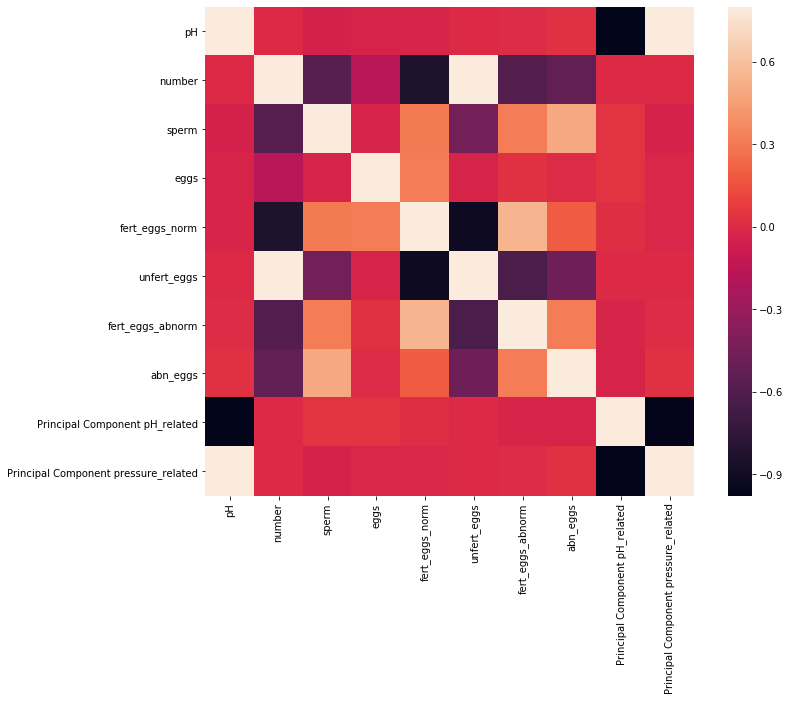

In [47]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);
# correlation plot

In [48]:
# For temporary purpose, we create a new dataframe urchin_2 and copy all entries of urchin in that dataframe
urchin_2 = urchin

In [49]:
urchin_2.head()

,site,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH_related,Principal Component pressure_related
0,Fogarty_Creek,8.03,1,4100.00,228.0,145.0,0.0,8.0,75.0,-656.176953,48.555263
1,Fogarty_Creek,8.03,2,410.00,248.0,207.0,0.0,9.0,32.0,-656.176953,48.555263
2,Fogarty_Creek,8.03,3,41.00,210.0,201.0,1.0,2.0,6.0,-656.176953,48.555263
3,Fogarty_Creek,8.03,4,4.10,232.0,107.0,123.0,2.0,0.0,-656.176953,48.555263
4,Fogarty_Creek,8.03,5,0.41,218.0,12.0,206.0,0.0,0.0,-656.176953,48.555263


In [50]:
# We divide the dataset on the basis of site, my intention is to divide these dataset with respect to site and then create 
# test and train set for each of these dataframe and then concatenate these dataframes
urchin_fogarty = urchin[0:288]

Bodega_Marine_Reserve = urchin[289:528]

Santa_Barbara_OA = urchin[529:]


In [51]:
urchin_fogarty.describe()

,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH_related,Principal Component pressure_related
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,7.796667,4.500000,960.982501,218.611111,100.326389,108.027778,1.684028,8.572917,122.199782,-5.622642
std,0.174915,2.295276,2389.538866,27.820883,93.220904,95.687896,3.029614,16.512952,572.037089,34.015714
min,7.610000,1.000000,0.000377,101.000000,0.000000,0.000000,0.000000,0.000000,-700.073869,-42.241813
25%,7.610000,2.750000,0.031600,200.000000,2.750000,0.000000,0.000000,0.000000,-516.407859,-38.748759
50%,7.750000,4.500000,2.553333,211.000000,98.500000,134.500000,0.000000,0.000000,140.315798,-16.532303
75%,8.030000,6.250000,194.666667,225.250000,190.000000,200.000000,2.000000,9.000000,759.887064,30.271590
max,8.030000,8.000000,13400.000000,427.000000,292.000000,265.000000,21.000000,97.000000,895.666163,55.941481


## Graphs

### 1-D graphs

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

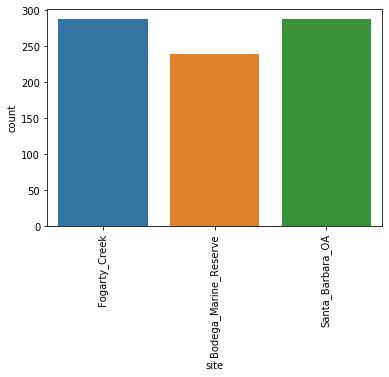

In [52]:
sns.countplot(urchin.site)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'pH distribution')

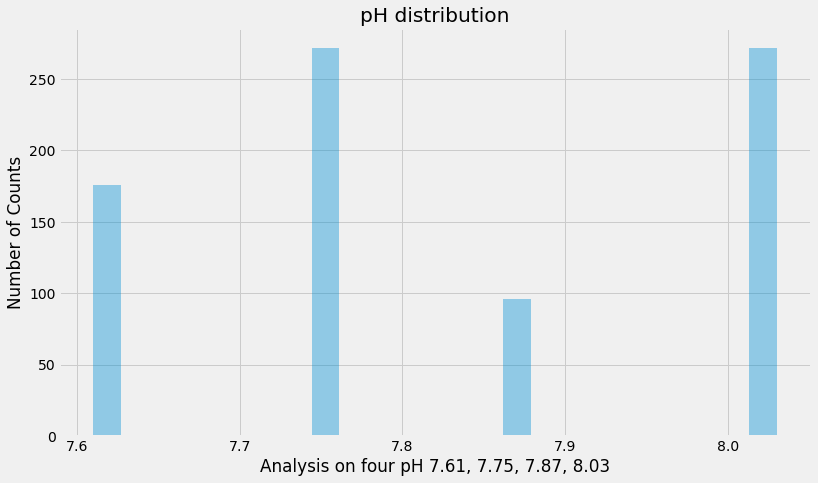

In [53]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(urchin.pH, bins = 25, kde = False)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Analysis on four pH 7.61, 7.75, 7.87, 8.03")
plt.ylabel("Number of Counts")
plt.title("pH distribution")

### 2-D graphs

#### Fertilized eggs out of total eggs

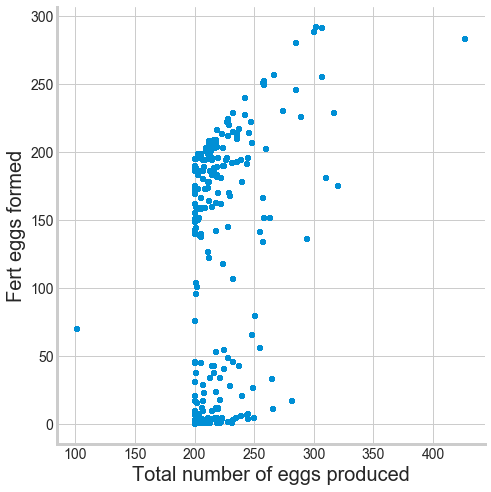

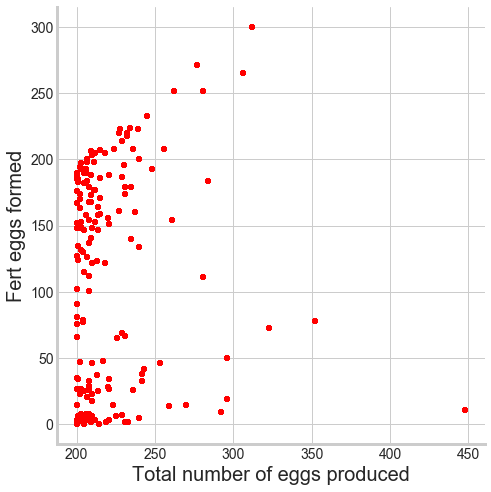

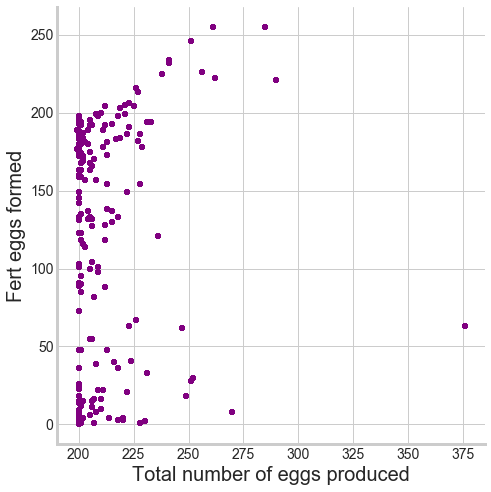

In [54]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=7) \
   .map(plt.scatter, "eggs", "fert_eggs_norm", marker = '+', label = 'big') \
   .set_xlabels("Total number of eggs produced", fontsize=20) \
   .set_ylabels("Fert eggs formed", fontsize=20) \
   #.add_legend(fontsize=20);
plt.show()
print("\n\n")

sns.set_style("whitegrid");
sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=7) \
   .map(plt.scatter, "eggs", "fert_eggs_norm", marker = '+', color = 'red', label = 'big') \
   .set_xlabels("Total number of eggs produced",fontsize=20) \
   .set_ylabels("Fert eggs formed",fontsize=20) \
   #.add_legend(fontsize=20);
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Santa_Barbara_OA, hue="site", height=7) \
   .map(plt.scatter, "eggs", "fert_eggs_norm", marker = '+', color = 'purple') \
   .set_xlabels("Total number of eggs produced",fontsize=20) \
   .set_ylabels("Fert eggs formed",fontsize=20) \
   #.add_legend(fontsize=20);
plt.show()

#### Unfertilized eggs out of total eggs

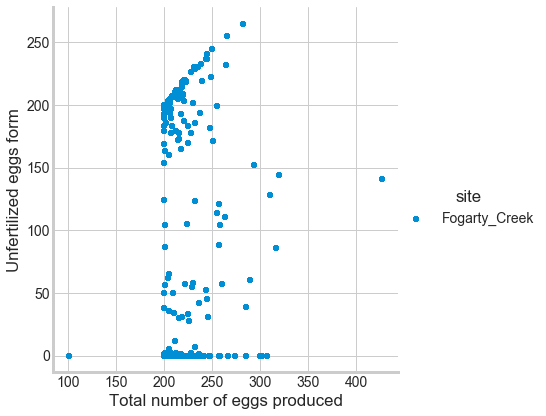

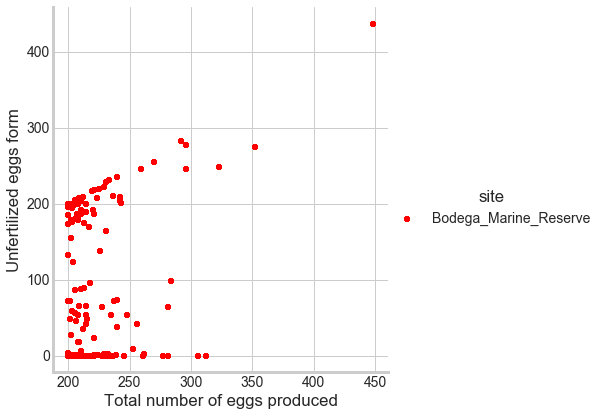

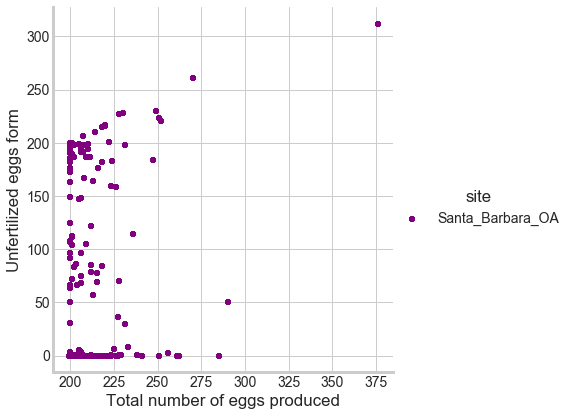

In [55]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "eggs", "unfert_eggs", marker = '+') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Unfertilized eggs form") \
   .add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "eggs", "unfert_eggs", marker = '+', color = 'red') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Unfertilized eggs form") \
   .add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "eggs", "unfert_eggs", marker = '+', color = 'purple') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Unfertilized eggs form") \
   .add_legend();
plt.show()

#### Fertilized eggs abnormal out of total eggs

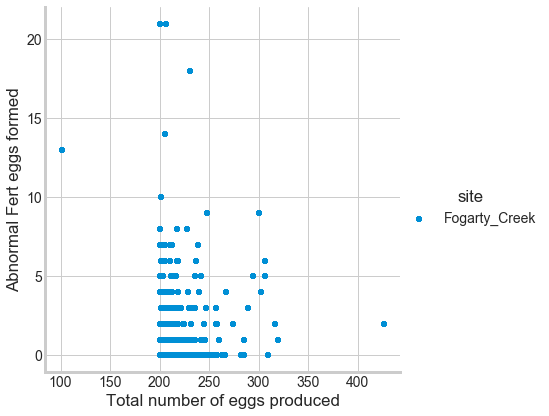

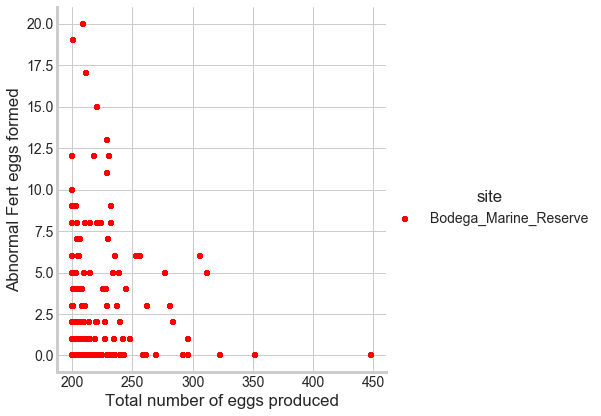

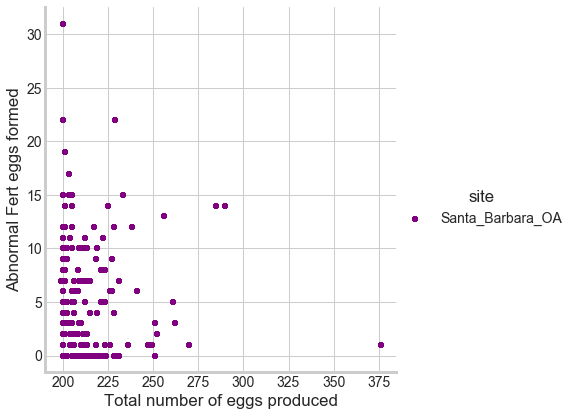

In [56]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "eggs", "fert_eggs_abnorm", marker = '+') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Abnormal Fert eggs formed") \
   .add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "eggs", "fert_eggs_abnorm", marker = '+', color = 'red') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Abnormal Fert eggs formed") \
   .add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "eggs", "fert_eggs_abnorm", marker = '+', color = 'purple') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Abnormal Fert eggs formed") \
   .add_legend();
plt.show()

#### Abnormal eggs out of total eggs

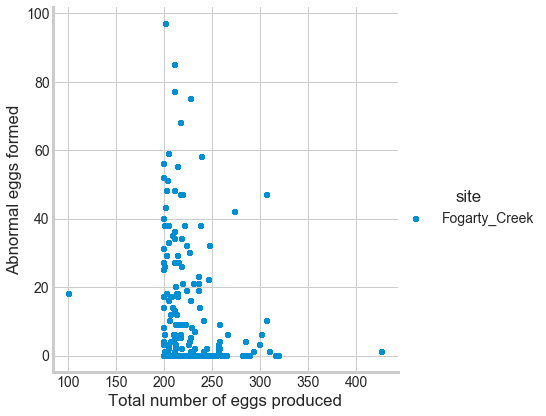

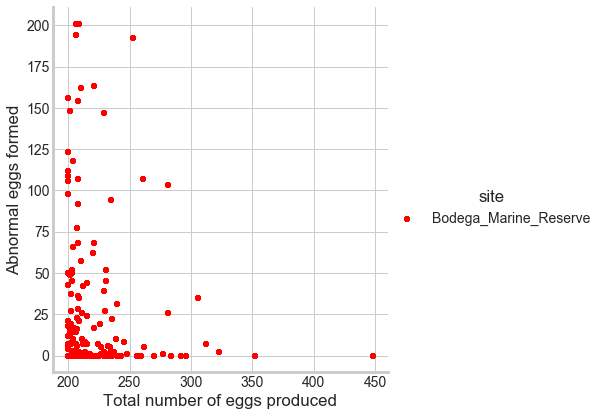

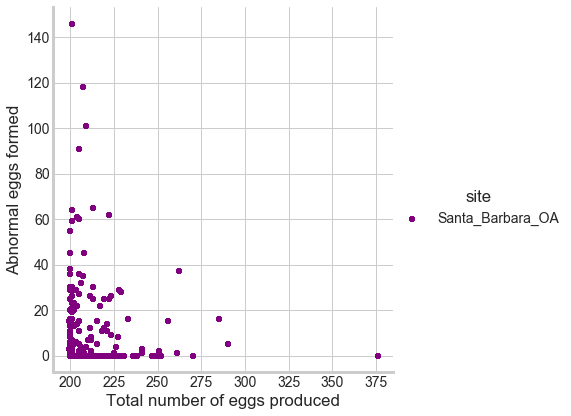

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "eggs", "abn_eggs", marker = '+') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "eggs", "abn_eggs", marker = '+', color = 'red') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "eggs", "abn_eggs", marker = '+', color = 'purple') \
   .set_xlabels("Total number of eggs produced") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

#### Fertilized eggs on varying pH

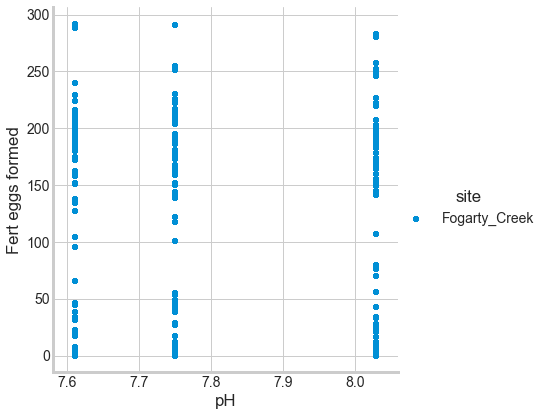

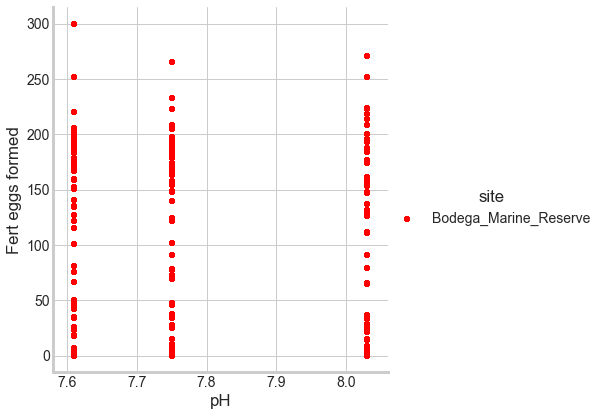

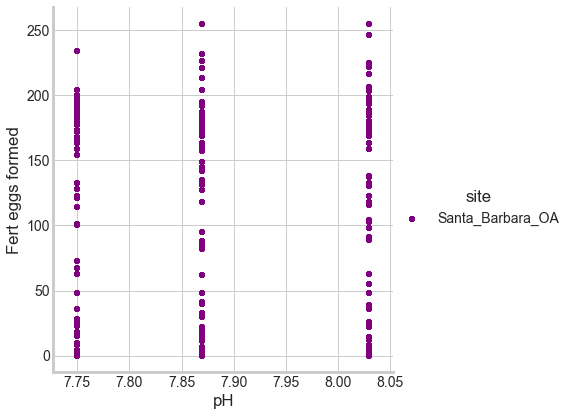

In [58]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "pH", "fert_eggs_norm", marker = '+') \
   .set_xlabels("pH") \
   .set_ylabels("Fert eggs formed") \
   .add_legend();

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "pH", "fert_eggs_norm", marker = '+', color = 'red') \
   .set_xlabels("pH") \
   .set_ylabels("Fert eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "pH", "fert_eggs_norm", marker = '+', color = 'purple') \
   .set_xlabels("pH") \
   .set_ylabels("Fert eggs formed") \
   .add_legend();
plt.show()

#### Unfertilized eggs on varying pH

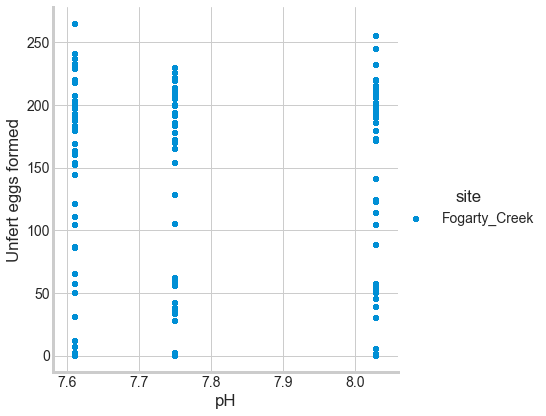

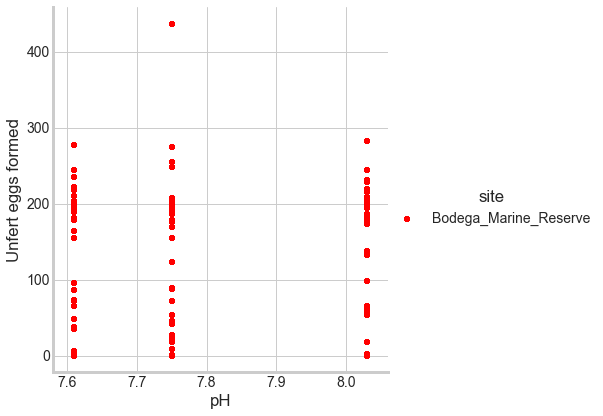

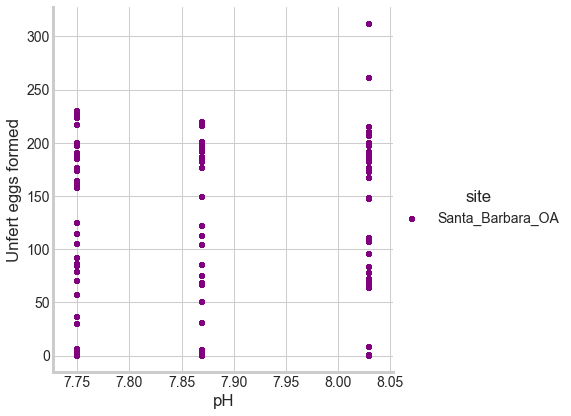

In [59]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "pH", "unfert_eggs", marker = '+') \
   .set_xlabels("pH") \
   .set_ylabels("Unfert eggs formed") \
   .add_legend();

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "pH", "unfert_eggs", marker = '+', color = 'red') \
   .set_xlabels("pH") \
   .set_ylabels("Unfert eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "pH", "unfert_eggs", marker = '+', color = 'purple') \
   .set_xlabels("pH") \
   .set_ylabels("Unfert eggs formed") \
   .add_legend();
plt.show()

#### Fertilized eggs abnormal on varying pH

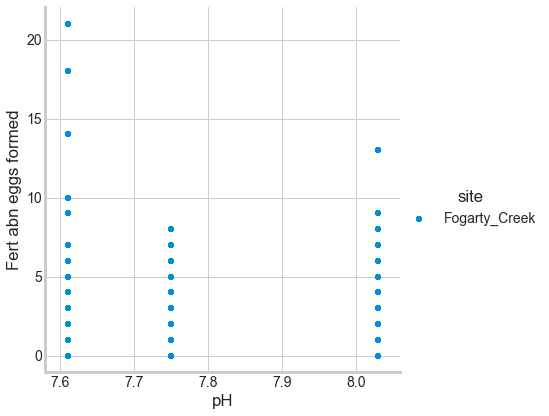

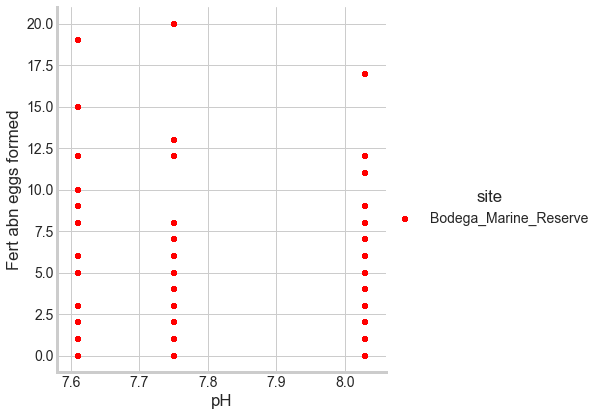

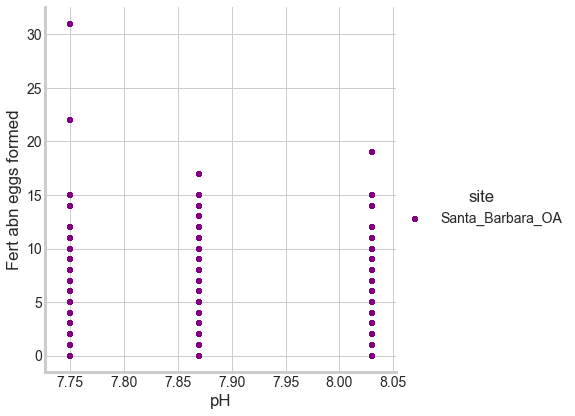

In [60]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "pH", "fert_eggs_abnorm", marker = '+') \
   .set_xlabels("pH") \
   .set_ylabels("Fert abn eggs formed") \
   .add_legend();

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "pH", "fert_eggs_abnorm", marker = '+', color = 'red') \
   .set_xlabels("pH") \
   .set_ylabels("Fert abn eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "pH", "fert_eggs_abnorm", marker = '+', color = 'purple') \
   .set_xlabels("pH") \
   .set_ylabels("Fert abn eggs formed") \
   .add_legend();
plt.show()

#### Abnormal eggs on varying pH

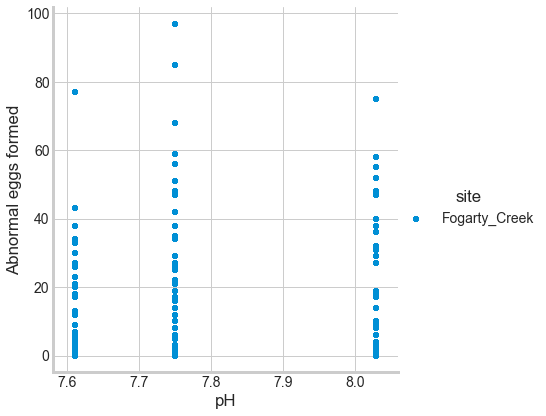

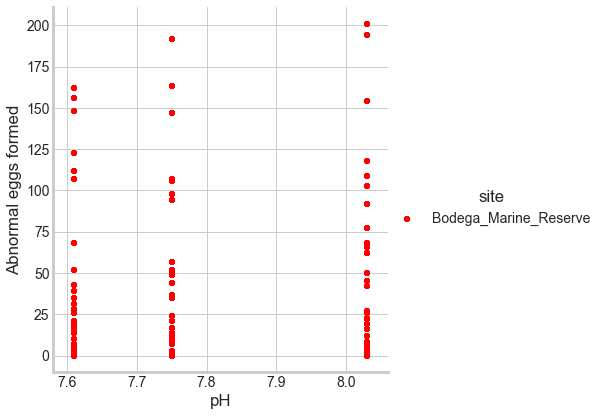

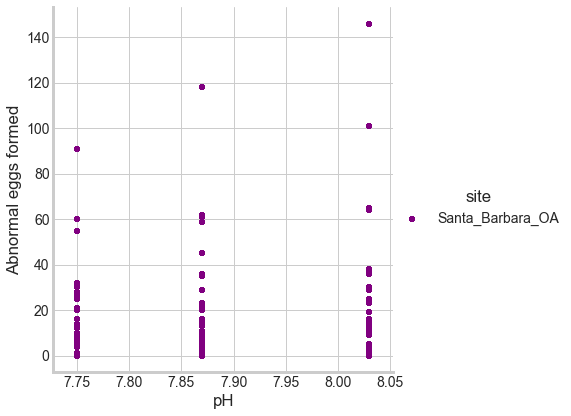

In [61]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "pH", "abn_eggs", marker = '+') \
   .set_xlabels("pH") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "pH", "abn_eggs", marker = '+', color = 'red') \
   .set_xlabels("pH") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "pH", "abn_eggs", marker = '+', color = 'purple') \
   .set_xlabels("pH") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

#### Fertilized eggs on varying sperm concentration

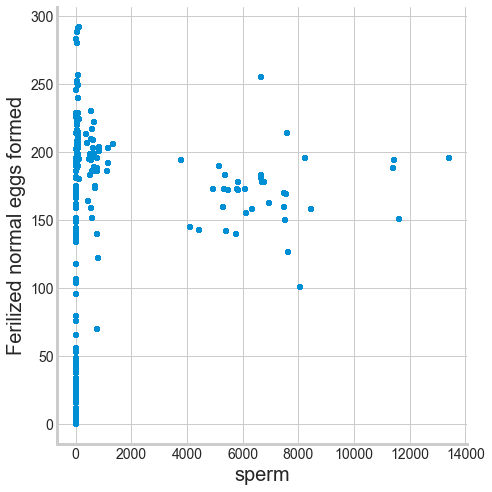

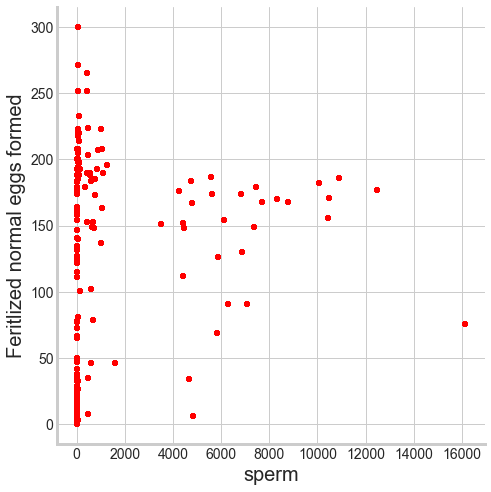

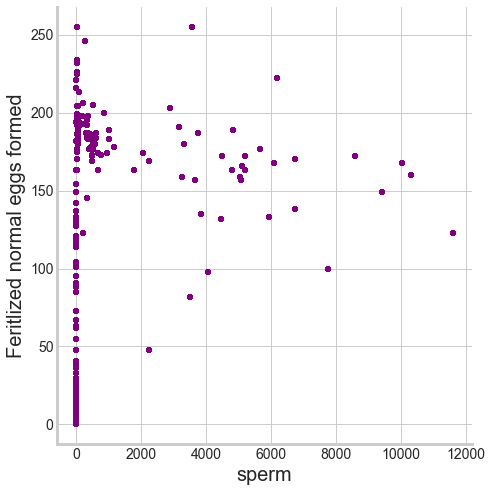

In [62]:
sns.FacetGrid(urchin_fogarty, hue="site", height=7) \
   .map(plt.scatter, "sperm", "fert_eggs_norm", marker = '+') \
   .set_xlabels("sperm",fontsize=20) \
   .set_ylabels("Ferilized normal eggs formed",fontsize=20) \
   #.add_legend(fontsize=20);
plt.show()

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=7) \
   .map(plt.scatter, "sperm", "fert_eggs_norm", marker = '+', color = 'red') \
   .set_xlabels("sperm",fontsize=20) \
   .set_ylabels("Feritlized normal eggs formed",fontsize=20) \
   #.add_legend(fontsize=20);
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=7) \
   .map(plt.scatter, "sperm", "fert_eggs_norm", marker = '+', color = 'purple') \
   .set_xlabels("sperm",fontsize=20) \
   .set_ylabels("Feritlized normal eggs formed",fontsize=20) \
   #.add_legend(fontsize=20);
plt.show()

#### Fertilized eggs on varying sperm concentration

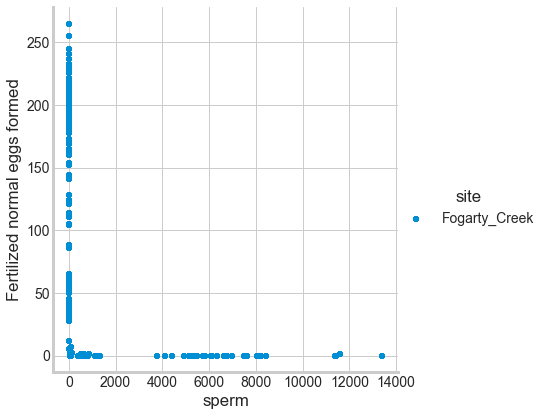

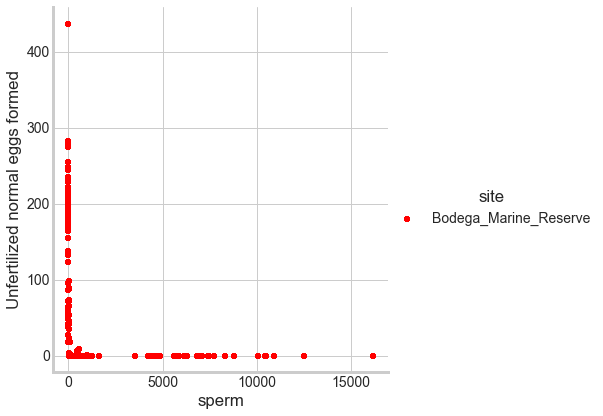

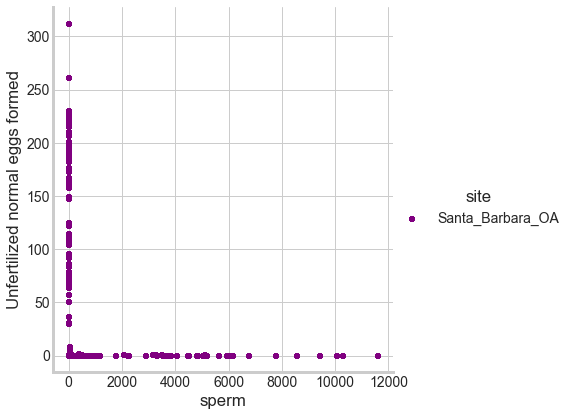

In [63]:
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "sperm", "unfert_eggs", marker = '+') \
   .set_xlabels("sperm") \
   .set_ylabels("Fertilized normal eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "sperm", "unfert_eggs", marker = '+', color = 'red') \
   .set_xlabels("sperm") \
   .set_ylabels("Unfertilized normal eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "sperm", "unfert_eggs", marker = '+', color = 'purple') \
   .set_xlabels("sperm") \
   .set_ylabels("Unfertilized normal eggs formed") \
   .add_legend();
plt.show()

#### Fertilized eggs on varying sperm concentration

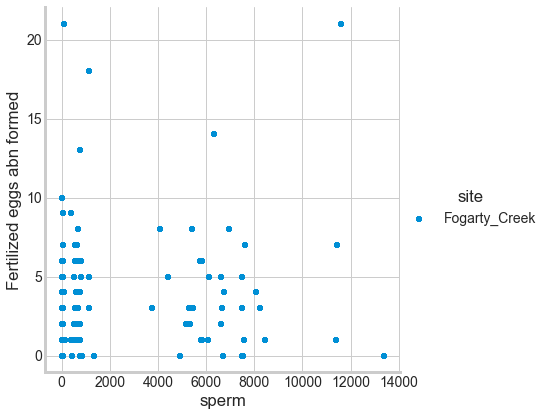

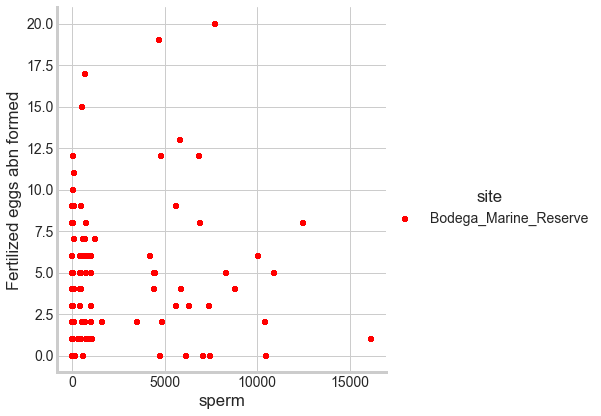

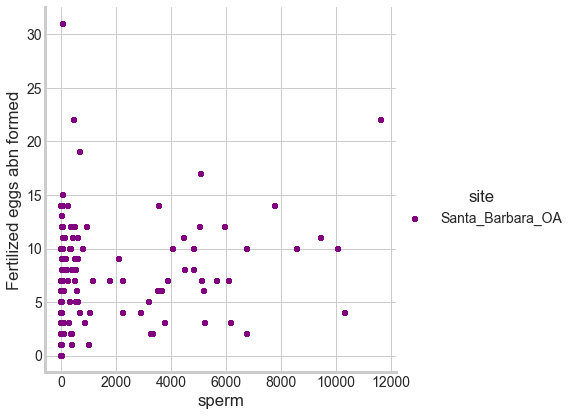

In [64]:
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "sperm", "fert_eggs_abnorm", marker = '+') \
   .set_xlabels("sperm") \
   .set_ylabels("Fertilized eggs abn formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "sperm", "fert_eggs_abnorm", marker = '+', color = 'red') \
   .set_xlabels("sperm") \
   .set_ylabels("Fertilized eggs abn formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "sperm", "fert_eggs_abnorm", marker = '+', color = 'purple') \
   .set_xlabels("sperm") \
   .set_ylabels("Fertilized eggs abn formed") \
   .add_legend();
plt.show()

#### Fertilized eggs on varying sperm concentration

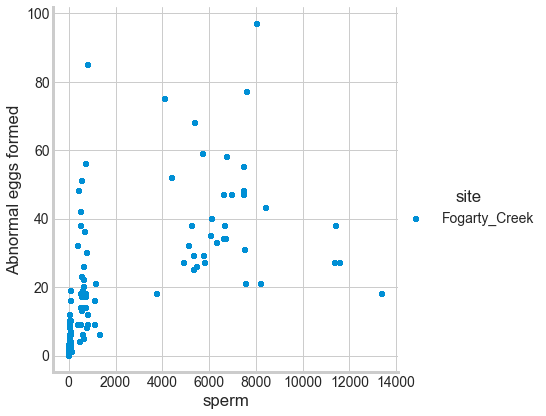

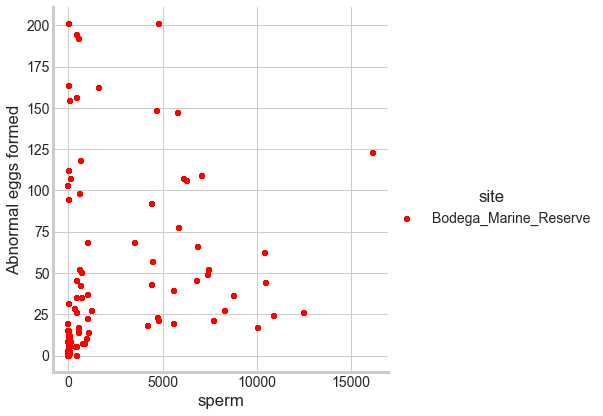

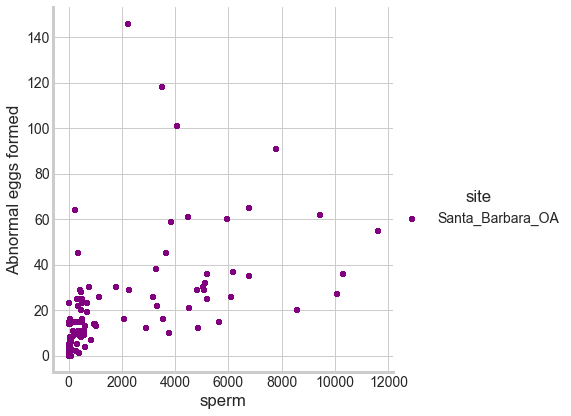

In [65]:
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "sperm", "abn_eggs", marker = '+') \
   .set_xlabels("sperm") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "sperm", "abn_eggs", marker = '+', color = 'red') \
   .set_xlabels("sperm") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "sperm", "abn_eggs", marker = '+', color = 'purple') \
   .set_xlabels("sperm") \
   .set_ylabels("Abnormal eggs formed") \
   .add_legend();
plt.show()

#### eggs vs PC_pH related

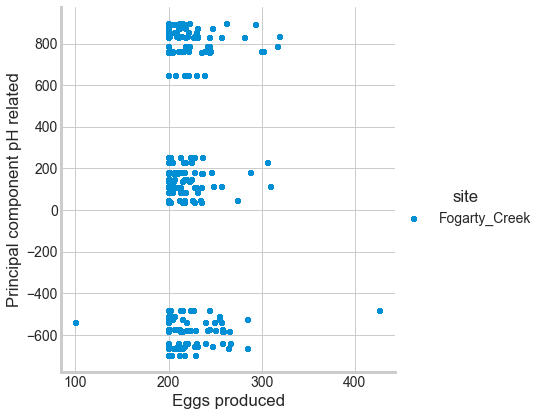

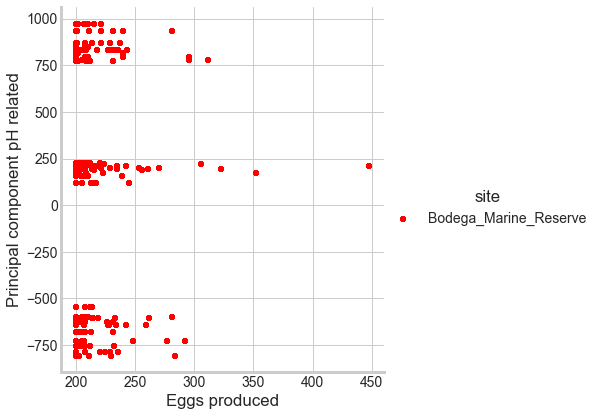

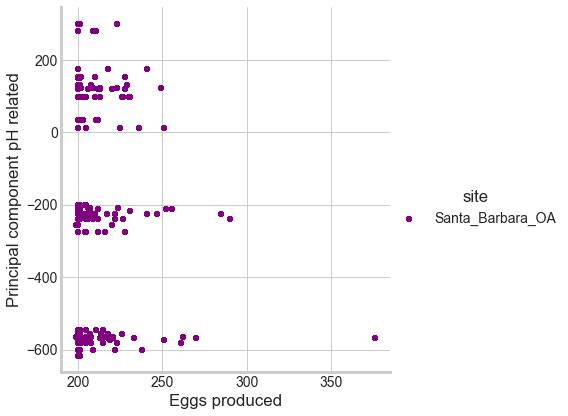

In [66]:
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "eggs", "Principal Component pH_related", marker = '+') \
   .set_xlabels("Eggs produced") \
   .set_ylabels("Principal component pH related") \
   .add_legend();
plt.show()

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "eggs", "Principal Component pH_related", marker = '+', color = 'red') \
   .set_xlabels("Eggs produced") \
   .set_ylabels("Principal component pH related") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "eggs", "Principal Component pH_related", marker = '+', color = 'purple') \
   .set_xlabels("Eggs produced") \
   .set_ylabels("Principal component pH related") \
   .add_legend();
plt.show()

#### eggs vs PC_pressure related

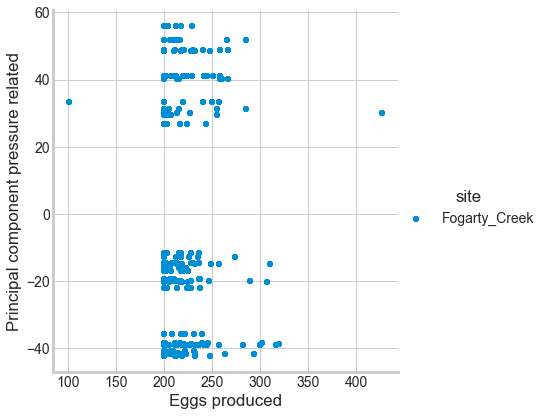

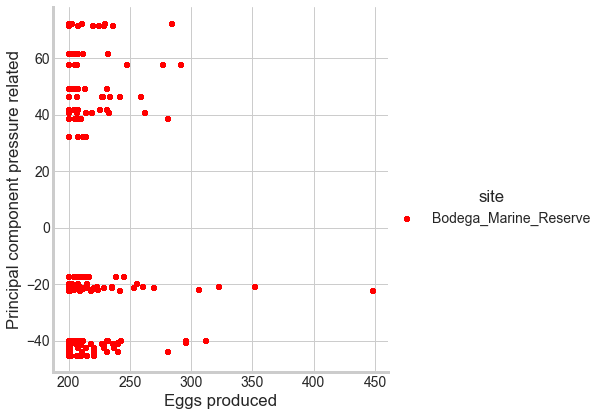

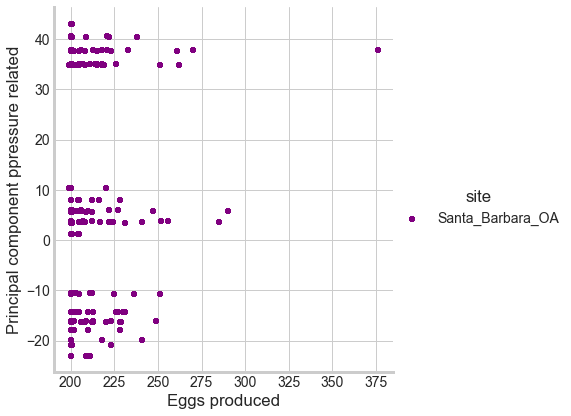

In [67]:
sns.FacetGrid(urchin_fogarty, hue="site", height=6) \
   .map(plt.scatter, "eggs", "Principal Component pressure_related", marker = '+') \
   .set_xlabels("Eggs produced") \
   .set_ylabels("Principal component pressure related") \
   .add_legend();
plt.show()

sns.FacetGrid(Bodega_Marine_Reserve, hue="site", height=6) \
   .map(plt.scatter, "eggs", "Principal Component pressure_related", marker = '+', color = 'red') \
   .set_xlabels("Eggs produced") \
   .set_ylabels("Principal component pressure related") \
   .add_legend();
plt.show()

sns.FacetGrid(Santa_Barbara_OA, hue="site", height=6) \
   .map(plt.scatter, "eggs", "Principal Component pressure_related", marker = '+', color = 'purple') \
   .set_xlabels("Eggs produced") \
   .set_ylabels("Principal component ppressure related") \
   .add_legend();
plt.show()

#### PC1 vs PC2

In [68]:
urchin_to = urchin.copy()
urchin_to.rename(columns = {'Principal Component pH_related': 'Principal Component pH related', 'Principal Component pressure_related' : 'Principal Component pressure related'}, inplace = True)


In [69]:
urchin_to.head()

,site,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH related,Principal Component pressure related
0,Fogarty_Creek,8.03,1,4100.00,228.0,145.0,0.0,8.0,75.0,-656.176953,48.555263
1,Fogarty_Creek,8.03,2,410.00,248.0,207.0,0.0,9.0,32.0,-656.176953,48.555263
2,Fogarty_Creek,8.03,3,41.00,210.0,201.0,1.0,2.0,6.0,-656.176953,48.555263
3,Fogarty_Creek,8.03,4,4.10,232.0,107.0,123.0,2.0,0.0,-656.176953,48.555263
4,Fogarty_Creek,8.03,5,0.41,218.0,12.0,206.0,0.0,0.0,-656.176953,48.555263


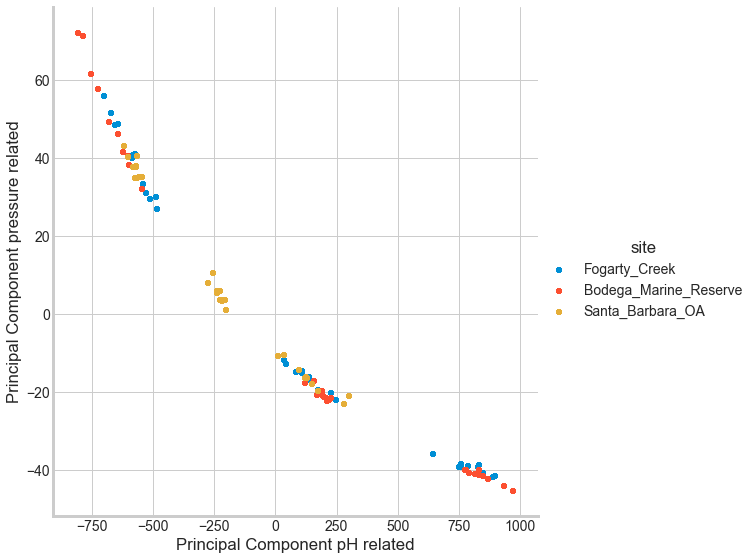

In [70]:
sns.set_style("whitegrid");
sns.FacetGrid(urchin_to, hue="site", height=8) \
   .map(plt.scatter, "Principal Component pH related", "Principal Component pressure related", marker = '+') \
   .add_legend();
plt.show()

### Data Pre-Processing

In [71]:
corr = urchin.corr()

In [72]:
corr

,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH_related,Principal Component pressure_related
pH,1.000000,0.000000e+00,-0.043562,-0.029420,-0.020285,0.001275,0.010401,0.031536,-9.777894e-01,9.767780e-01
number,0.000000,1.000000e+00,-0.574193,-0.166512,-0.833820,0.899893,-0.595490,-0.527587,1.812871e-18,-9.137611e-19
sperm,-0.043562,-5.741928e-01,1.000000,-0.030080,0.304958,-0.443815,0.316212,0.496165,3.775769e-02,-3.357747e-02
eggs,-0.029420,-1.665115e-01,-0.030080,1.000000,0.314042,-0.028113,0.033574,0.002586,3.755939e-02,-1.841950e-02
fert_eggs_norm,-0.020285,-8.338205e-01,0.304958,0.314042,1.000000,-0.916968,0.543761,0.194386,2.128953e-02,-1.672417e-02
unfert_eggs,0.001275,8.998931e-01,-0.443815,-0.028113,-0.916968,1.000000,-0.625628,-0.477321,8.377737e-05,1.003351e-03
fert_eggs_abnorm,0.010401,-5.954897e-01,0.316212,0.033574,0.543761,-0.625628,1.000000,0.320515,-2.368800e-02,1.143038e-02
abn_eggs,0.031536,-5.275870e-01,0.496165,0.002586,0.194386,-0.477321,0.320515,1.000000,-3.016060e-02,3.101951e-02
Principal Component pH_related,-0.977789,1.812871e-18,0.037758,0.037559,0.021290,0.000084,-0.023688,-0.030161,1.000000e+00,-9.640434e-01
Principal Component pressure_related,0.976778,-9.137611e-19,-0.033577,-0.018419,-0.016724,0.001003,0.011430,0.031020,-9.640434e-01,1.000000e+00


In [73]:
from sklearn.preprocessing import LabelEncoder  # To convert categorial value to numerical value
le = LabelEncoder()

urchin['site'] = le.fit_transform(urchin['site'])


In [74]:
urchin.head() # fogarty-creek = 1, bodega_marine = 0, Santa_barabara = 2

,site,pH,number,sperm,eggs,fert_eggs_norm,unfert_eggs,fert_eggs_abnorm,abn_eggs,Principal Component pH_related,Principal Component pressure_related
0,1,8.03,1,4100.00,228.0,145.0,0.0,8.0,75.0,-656.176953,48.555263
1,1,8.03,2,410.00,248.0,207.0,0.0,9.0,32.0,-656.176953,48.555263
2,1,8.03,3,41.00,210.0,201.0,1.0,2.0,6.0,-656.176953,48.555263
3,1,8.03,4,4.10,232.0,107.0,123.0,2.0,0.0,-656.176953,48.555263
4,1,8.03,5,0.41,218.0,12.0,206.0,0.0,0.0,-656.176953,48.555263


In [75]:
# we divide our dataframe into two sets (feature and target variable)
final_features = ['site', 'pH', 'sperm', 'eggs', 'Principal Component pH_related', 'Principal Component pressure_related']
final_target = ['fert_eggs_norm', 'unfert_eggs', 'fert_eggs_abnorm', 'abn_eggs']
one_target = ['fert_eggs_norm']

In [76]:
X = urchin[final_features]
y = urchin[final_target]
y_one = urchin[one_target]

## Machine learning Models

### 1) Linear Regression 

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold

kf = KFold(n_splits=8, random_state=42, shuffle=False)
scores_lin = []

# instantiate the model
linreg = LinearRegression()

#fit the model with data
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    linreg.fit(X_train, y_train)
    scores_lin.append(linreg.score(X_test, y_test))
    #print(scores_lin, end = "\n\n")
    
print(np.sqrt(np.mean(np.power(scores_lin,2))), "<== coefficient of determination score")
print("\n")
#predict the response for new observations
y_pred = linreg.predict(X_test)

print(linreg.intercept_, "\nIntercept of fert_egg_norm, unfert_egg, fert_egg_abnorm, abn_eggs respectively.\n\n\n" )


0.18819735184206404 <== coefficient of determination score


[-198.3405896   509.82329501   41.39768815 -348.26477565] 
Intercept of fert_egg_norm, unfert_egg, fert_egg_abnorm, abn_eggs respectively.





https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0

The coefficient of determination is the square of the correlation (r) between predicted y scores and actual y scores; thus, it ranges from 0 to 1.

In [79]:
# zip final_features and its coefficient 
list(zip(final_target, linreg.coef_))

[('fert_eggs_norm',
  array([1.15633092e+01, 9.50182863e-01, 1.25608694e-02, 1.21679642e+00,
         1.15044490e-02, 1.61447503e-01])),
 ('unfert_eggs',
  array([-4.48037944e+00, -4.22976235e+01, -1.86585279e-02, -2.30814810e-01,
         -9.67231150e-04,  1.46363866e-01])),
 ('fert_eggs_abnorm',
  array([ 7.82187720e-01, -5.40927145e+00,  4.88776987e-04,  9.45105297e-03,
         -1.16502938e-05,  2.30723143e-02])),
 ('abn_eggs',
  array([-7.82107659e+00,  4.61556490e+01,  5.61233894e-03,  4.68037399e-03,
         -1.05589301e-02, -3.29394767e-01]))]

In [80]:
# here we create a dataframe and check the output
df = pd.DataFrame({'site': [1],
                   'pH': [8.03],
                   'sperm': [410.00], 
                   'eggs': [248],
                   'Principal Component pH_related' : [-656.176953],
                   'Principal Component pressure_related' : [48.555263]})

## 1	8.03	2	410.00	248.0	207.0	0.0	9.0	32.0	-656.176953	48.555263

In [81]:
print("We expect this prediction => (207.0, 0.0, 9.0, 32)", end = "\n\n")
print("We get this =>", linreg.predict(df))

We expect this prediction => (207.0, 0.0, 9.0, 32)

We get this => [[128.05832888 108.54234017   2.4156128    8.94047788]]


## 2) KNN algorithm

In [82]:
# import from scikit-learn libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#using gridsearch to find the best parameter
params = {'n_neighbors':[8]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

scores_knn = []

# fit the model
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_scaled)
    model.fit(X_train, y_train)
    scores_knn.append(model.score(X_test, y_test))
    

#print(np.mean(scores_knn), "<== Accuracy of the algorithm")
print(np.sqrt(np.mean(np.power(scores_knn,2))), "<== coefficient of determination score")
    
# Predictions
pred_knn = model.predict(X_test)


0.2667548589429337 <== coefficient of determination score


In [83]:
scores_knn

[-0.030935149667800973,
 -0.0354344181375497,
 -0.09277253156649387,
 -0.4278845799088336,
 0.03683921713627312,
 -0.12716633941600813,
 -0.3592855386969853,
 -0.47827418520146053]

In [84]:
# here we create a dataframe and check the output
df = pd.DataFrame({'site': [1],
                   'pH': [8.03],
                   'sperm': [410.00], 
                   'eggs': [248],
                   'Principal Component pH_related' : [-656.176953],
                   'Principal Component pressure_related' : [48.555263]})

## 1	8.03	2	410.00	248.0	207.0	0.0	9.0	32.0	-656.176953	48.555263

In [85]:
print("We expect this prediction => (207.0, 0.0, 9.0, 32)", end = "\n\n")
print("We get this =>", model.predict(df))

We expect this prediction => (207.0, 0.0, 9.0, 32)

We get this => [[149.75    0.      5.     61.375]]


## 3) Random Forest Algorithm

In [86]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10000, random_state = 42)

scores_random = []

# Train the model on training data
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)
    scores_random.append(rf.score(X_test, y_test))

print(np.sqrt(np.mean(np.power(scores_random,2))), "<== Accuracy of the algorithm")

0.8942957092797758 <== Accuracy of the algorithm


In [87]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: fert_eggs_norm      14.77
unfert_eggs          7.20
fert_eggs_abnorm     2.35
abn_eggs             7.00
dtype: float64


In [88]:
# here we create a dataframe and check the output
df = pd.DataFrame({'site': [1],
                   'pH': [8.03],
                   'sperm': [410.00], 
                   'eggs': [248],
                   'Principal Component pH_related' : [-656.176953],
                   'Principal Component pressure_related' : [48.555263]})

## 1	8.03	2	410.00	248.0	207.0	0.0	9.0	32.0	-656.176953	48.555263

In [89]:
print("We expect this prediction => (207.0, 0.0, 9.0, 32.0)", end = "\n\n")
print("We get this =>", rf.predict(df))

We expect this prediction => (207.0, 0.0, 9.0, 32.0)

We get this => [[2.151051e+02 5.320000e-02 7.124200e+00 2.568990e+01]]


## 4) Neural Network

In [90]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

kf = KFold(n_splits=11, random_state=42, shuffle=False)

clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(21, 21, 26), random_state=8, max_iter=1000)
scores_neural = []
t = []

# Train the model on training data
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)
    t.append(clf.score(X_train, y_train))
    scores_neural.append(clf.score(X_test, y_test))

print(np.sqrt(np.mean(np.power(scores_neural,2))), "<== Accuracy of the algorithm")
#print(np.sqrt(np.mean(np.power(scores_neural,2))))*100

0.9196724343531307 <== Accuracy of the algorithm


In [91]:
print(scores_neural)
print("\n")
print(t)
scores_neural = np.mean(scores_neural)

[0.9739921075925534, 0.9556420160970532, 0.9453392270082923, 0.9393144495563769, 0.5176645086689173, 0.962149100443093, 0.9614006847547347, 0.9498740554460022, 0.9634756167473555, 0.9378740404261547, 0.9152751832663866]


[0.9159253196610224, 0.9209211340080431, 0.9220345648886176, 0.9217452760929042, 0.9614671072476463, 0.918998829119269, 0.9178542048506616, 0.9189016098632734, 0.920061152596553, 0.9211909631889647, 0.9248482471527801]


In [92]:
# here we create a dataframe and check the output
df = pd.DataFrame({'site': [1],
                   'pH': [8.03],
                   'sperm': [410.00], 
                   'eggs': [248],
                   'Principal Component pH_related' : [-656.176953],
                   'Principal Component pressure_related' : [48.555263]})

## 1	8.03	2	410.00	248.0	207.0	0.0	9.0	32.0	-656.176953	48.555263

In [93]:
print("We expect this prediction => (207.0, 0.0, 9.0, 32)")
print("We get this =>", clf.predict(df))

We expect this prediction => (207.0, 0.0, 9.0, 32)
We get this => [[211.03887226   0.69139771   6.95273874  28.0816682 ]]


# Accuracy

In [94]:
# initialize list of lists 
linear_acc = np.sqrt(np.mean(np.power(scores_lin,2))) * 100
knn_acc = np.sqrt(np.mean(np.power(scores_knn,2))) * 100
random_acc = np.sqrt(np.mean(np.power(scores_random,2))) * 100
neutral_acc = np.sqrt(np.mean(np.power(scores_neural,2))) * 100

data = [linear_acc, knn_acc, random_acc, neutral_acc]
  
# Create the pandas DataFrame 
coefficient_of_determination_score = pd.DataFrame(data, columns = ['coefficient of determination score'], index = ['linear_regression', 'kNN', 'random_forest', 'neural_network'])

In [95]:
coefficient_of_determination_score

,coefficient of determination score
linear_regression,18.819735
kNN,26.675486
random_forest,89.429571
neural_network,91.109100


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

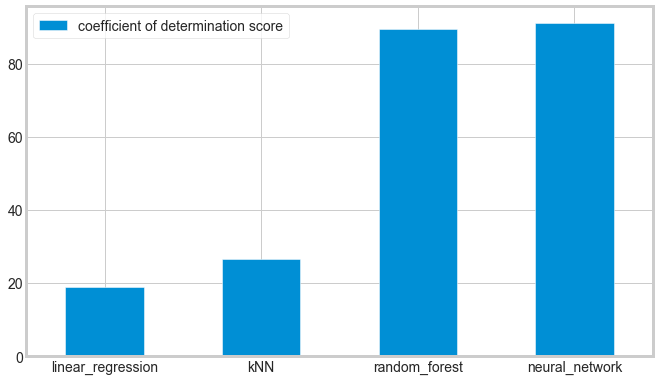

In [96]:
coefficient_of_determination_score.plot(kind='bar', figsize=(10,6));
plt.xticks(rotation=0)